In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startups-expansion/startup-expansion.xlsx


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Startup_Expention

In [3]:
startup=pd.read_excel('/kaggle/input/startups-expansion/startup-expansion.xlsx')
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [4]:
#info
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [5]:
#describe Data
Describe=startup.describe()
DB=startup[['Revenue','Marketing Spend']].describe()
print(f'{Describe} ')
print(DB)

         Store ID  Marketing Spend       Revenue
count  150.000000       150.000000    150.000000
mean    75.500000      2893.146667  39301.433333
std     43.445368       367.862817  15465.753977
min      1.000000      1811.000000  15562.000000
25%     38.250000      2662.250000  21113.500000
50%     75.500000      2898.000000  42993.000000
75%    112.750000      3111.500000  51145.500000
max    150.000000      3984.000000  68828.000000 
            Revenue  Marketing Spend
count    150.000000       150.000000
mean   39301.433333      2893.146667
std    15465.753977       367.862817
min    15562.000000      1811.000000
25%    21113.500000      2662.250000
50%    42993.000000      2898.000000
75%    51145.500000      3111.500000
max    68828.000000      3984.000000


In [6]:
startup.duplicated().value_counts()

False    150
dtype: int64

# Cleaning Data

In [7]:
# To ensure this data is clean or No
startup.isnull().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [8]:
# To remove Rows with missing data 
startup.dropna()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [9]:
#  Check foer duplicates data
startup.duplicated().sum()

0

# Exploration Data

In [10]:
# do New colum called Profits
startup['Profits']=startup['Revenue']-startup['Marketing Spend']
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profits
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [11]:
startup.keys()

Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue', 'Profits'],
      dtype='object')

In [12]:
# To find what the most State you can achieve profit
startup[startup['Profits']==startup['Profits'].max()]['State']


63    Arkansas
Name: State, dtype: object

In [13]:
# To find what is the most city can achieve profits
startup[startup['Profits']==startup['Profits'].max()]['City']


63    Little Rock
Name: City, dtype: object

In [14]:
# to find what is the sales region achieve the most profits
startup[startup['Profits']==startup['Profits'].max()]['Sales Region']


63    Region 2
Name: Sales Region, dtype: object

In [15]:
startup[startup['Profits']==startup['Profits'].max()]['Store ID']


63    64
Name: Store ID, dtype: int64

In [16]:
# to find what is the least Store and all informatin about this store
Data=startup.keys()
for i in Data:
    x=startup[startup['Profits']==startup['Profits'].min()][i]
    print(f' The {i} of store is : {x}')


 The Store ID of store is : 53    54
Name: Store ID, dtype: int64
 The City of store is : 53    Everett
Name: City, dtype: object
 The State of store is : 53    Washington
Name: State, dtype: object
 The Sales Region of store is : 53    Region 2
Name: Sales Region, dtype: object
 The New Expansion of store is : 53    Old
Name: New Expansion, dtype: object
 The Marketing Spend of store is : 53    3129
Name: Marketing Spend, dtype: int64
 The Revenue of store is : 53    15562
Name: Revenue, dtype: int64
 The Profits of store is : 53    12433
Name: Profits, dtype: int64


In [17]:
startup['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [18]:
startup['State'].nunique()

35

In [19]:
# To know how many old and new of store
startup['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [20]:
# to know where new store
startup.loc[startup['New Expansion'] == 'New', 'State']


140     Tennessee
141       Arizona
142      Illinois
143    California
144    California
145    New Jersey
146         Texas
147      Illinois
148         Texas
149    California
Name: State, dtype: object

In [21]:
# what state of old store
startup.loc[startup['New Expansion'] == 'Old', 'State']

0           Arizona
1             Texas
2        Washington
3             Texas
4            Kansas
           ...     
135      California
136        Michigan
137      California
138       Louisiana
139    Rhode Island
Name: State, Length: 140, dtype: object

# Visualization Data

Text(0.5, 1.0, 'Sales Region')

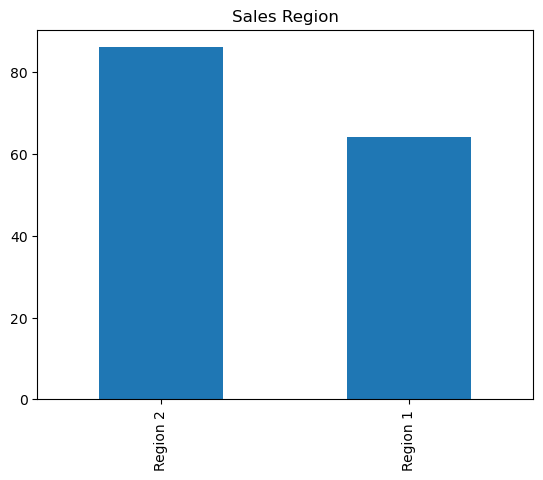

In [22]:
startup['Sales Region'].value_counts().plot.bar()
plt.title('Sales Region')

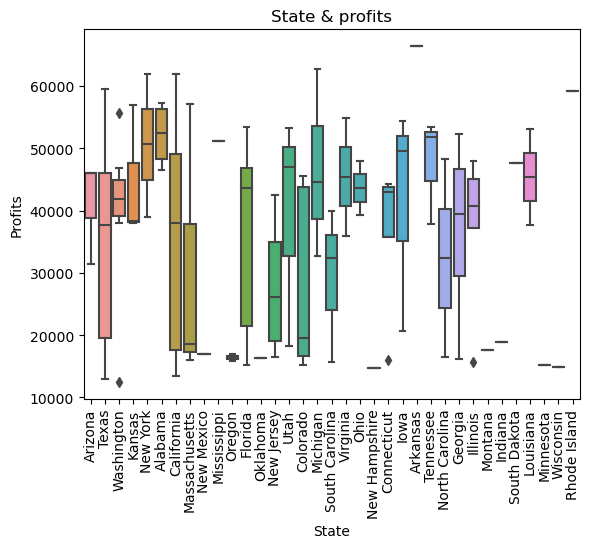

In [23]:
sns.boxplot(x='State', y='Profits', data=startup)
plt.xticks(rotation=90)
plt.title('State & profits')
plt.xlabel('State')
plt.ylabel('Profits')
plt.show()


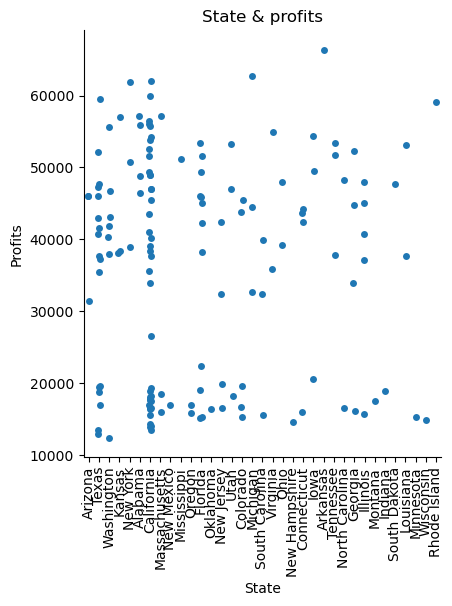

In [24]:
sns.catplot(x='State',y='Profits', data=startup)
plt.xticks(rotation=90)
plt.title('State & profits')
plt.xlabel('State')
plt.ylabel('Profits')
plt.show()


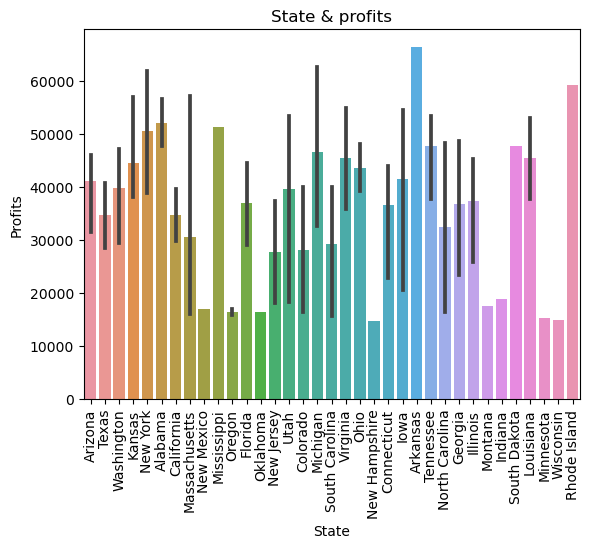

In [25]:
sns.barplot(x='State',y='Profits', data=startup)
plt.xticks(rotation=90)
plt.title('State & profits')
plt.xlabel('State')
plt.ylabel('Profits')
plt.show()

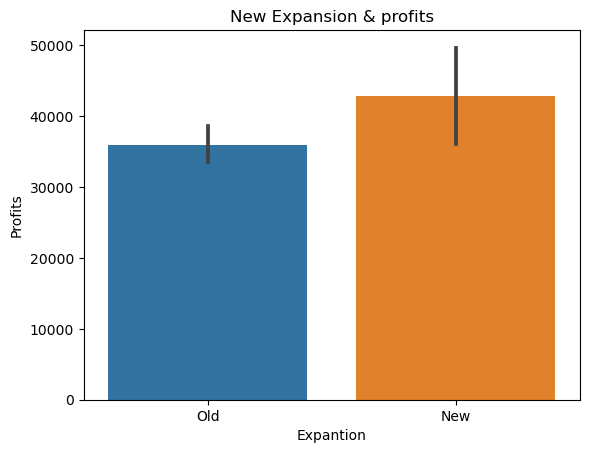

In [26]:
sns.barplot(x='New Expansion',y='Profits', data=startup)
# plt.xticks(rotation=90)
plt.title('New Expansion & profits')
plt.xlabel('Expantion')
plt.ylabel('Profits')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


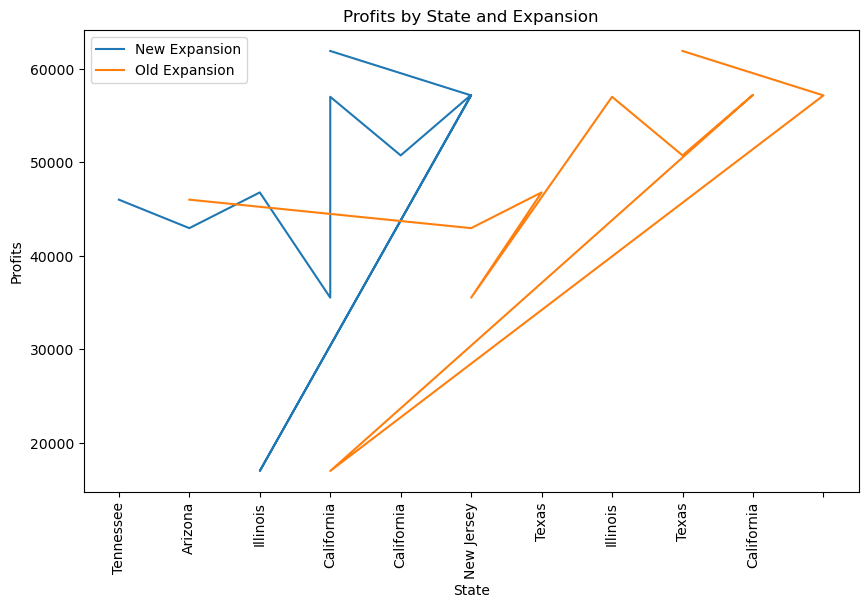

In [27]:

# Filter data by 'New Expansion' column
new_expansion = startup.loc[startup['New Expansion'] == 'New']
old_expansion = startup.loc[startup['New Expansion'] == 'Old'].head(10)

# Get x and y values
x_new = new_expansion['State']
x_old = old_expansion['State']
y = startup['Profits'].head(10)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_new, y, label='New Expansion')
ax.plot(x_old, y, label='Old Expansion')

# Customize plot
ax.set_xticklabels(x_new, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Profits')
ax.set_title('Profits by State and Expansion')
ax.legend()

# Show plot
plt.show()
